In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
import lightgbm as lgb


In [2]:
df= pd.read_csv('eplmatches.csv')
df

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A
...,...,...,...,...,...,...,...,...
11641,2022,9,2021-10-23,Leeds United,1,1,Wolves,D
11642,2022,9,2021-10-23,Brighton,1,4,Manchester City,A
11643,2022,9,2021-10-24,West Ham,1,0,Tottenham,H
11644,2022,9,2021-10-24,Brentford,1,2,Leicester City,A


In [3]:
df.Home.unique()

array(['Coventry City', 'Leeds United', 'Sheffield Utd', 'Crystal Palace',
       'Arsenal', 'Ipswich Town', 'Everton', 'Southampton', 'Chelsea',
       "Nott'ham Forest", 'Manchester City', 'Blackburn',
       'Manchester Utd', 'Liverpool', 'Middlesbrough', 'Sheffield Weds',
       'Wimbledon', 'QPR', 'Oldham Athletic', 'Tottenham', 'Norwich City',
       'Aston Villa', 'Newcastle Utd', 'West Ham', 'Swindon Town',
       'Leicester City', 'Bolton', 'Sunderland', 'Derby County',
       'Barnsley', 'Charlton Ath', 'Watford', 'Bradford City', 'Fulham',
       'West Brom', 'Birmingham City', 'Portsmouth', 'Wolves',
       'Wigan Athletic', 'Reading', 'Hull City', 'Stoke City', 'Burnley',
       'Blackpool', 'Swansea City', 'Cardiff City', 'Bournemouth',
       'Brighton', 'Huddersfield', 'Brentford'], dtype=object)

In [4]:
df.loc[df['FTR'] =='H', 'Won'] = df['Home']
df.loc[df['FTR'] =='A', 'Won'] = df['Away']
df.loc[df['FTR'] =='H', 'Lost'] =df['Away']
df.loc[df['FTR'] =='A', 'Lost'] =df['Home']
df.loc[df['FTR'] =='D', 'HomeDraw'] = df['Home']
df.loc[df['FTR'] =='D', 'AwayDraw'] = df['Away']

In [5]:
df=df[df.Wk<20] # Getting only the games till the mid-season
"""with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df)"""
df

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR,Won,Lost,HomeDraw,AwayDraw
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H,Coventry City,Middlesbrough,NaN,NaN
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H,Leeds United,Wimbledon,NaN,NaN
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H,Sheffield Utd,Manchester Utd,NaN,NaN
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D,NaN,NaN,Crystal Palace,Blackburn
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A,Norwich City,Arsenal,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
11641,2022,9,2021-10-23,Leeds United,1,1,Wolves,D,NaN,NaN,Leeds United,Wolves
11642,2022,9,2021-10-23,Brighton,1,4,Manchester City,A,Manchester City,Brighton,NaN,NaN
11643,2022,9,2021-10-24,West Ham,1,0,Tottenham,H,West Ham,Tottenham,NaN,NaN
11644,2022,9,2021-10-24,Brentford,1,2,Leicester City,A,Leicester City,Brentford,NaN,NaN


In [6]:
CountWin = df.groupby(['Season_End_Year', 'Won']).agg({'Won': ['count']})
CountWin.columns = ['CountWins']
CountWin=CountWin.reset_index()
CountWin.rename(columns = {'Won':'Team'}, inplace = True)

In [7]:
CountLosses = df.groupby(['Season_End_Year','Lost']).agg({'Lost': ['count']})
CountLosses.columns = ['CountLosses']
CountLosses=CountLosses.reset_index()
CountLosses.rename(columns = {'Lost':'Team'}, inplace = True)

In [8]:
CountHomeDraws = df.groupby(['Season_End_Year','HomeDraw']).agg({'HomeDraw': ['count']})
CountHomeDraws.columns = ['CountDraws']
CountHomeDraws=CountHomeDraws.reset_index()
CountHomeDraws.rename(columns = {'HomeDraw':'Team'}, inplace = True)
CountHomeDraws.fillna(0,inplace=True)
CountHomeDraws

,Season_End_Year,Team,CountDraws
0,1993,Aston Villa,3
1,1993,Blackburn,1
2,1993,Chelsea,3
3,1993,Coventry City,3
4,1993,Crystal Palace,5
...,...,...,...
567,2022,Southampton,5
568,2022,Tottenham,1
569,2022,Watford,1
570,2022,West Ham,2


In [9]:
CountAwayDraws = df.groupby(['Season_End_Year','AwayDraw']).agg({'AwayDraw': ['count']})
CountAwayDraws.columns = ['CountDraws']
CountAwayDraws=CountAwayDraws.reset_index()
CountAwayDraws.rename(columns = {'AwayDraw':'Team'}, inplace = True)
CountAwayDraws

,Season_End_Year,Team,CountDraws
0,1993,Arsenal,2
1,1993,Aston Villa,4
2,1993,Blackburn,6
3,1993,Chelsea,2
4,1993,Coventry City,5
...,...,...,...
571,2022,Southampton,3
572,2022,Tottenham,1
573,2022,Watford,1
574,2022,West Ham,2


In [10]:
CountLosses

,Season_End_Year,Team,CountLosses
0,1993,Arsenal,8
1,1993,Aston Villa,3
2,1993,Blackburn,4
3,1993,Chelsea,5
4,1993,Coventry City,5
...,...,...,...
597,2022,Southampton,6
598,2022,Tottenham,6
599,2022,Watford,13
600,2022,West Ham,6


In [11]:

CountWin

,Season_End_Year,Team,CountWins
0,1993,Arsenal,9
1,1993,Aston Villa,9
2,1993,Blackburn,8
3,1993,Chelsea,9
4,1993,Coventry City,6
...,...,...,...
601,2022,Southampton,5
602,2022,Tottenham,11
603,2022,Watford,4
604,2022,West Ham,9


In [12]:
Merged = pd.merge(CountWin, CountLosses, on=['Season_End_Year','Team'],how='left')
Merged = pd.merge(Merged, CountHomeDraws, on=['Season_End_Year','Team'],how='left')
Merged = pd.merge(Merged, CountAwayDraws, on=['Season_End_Year','Team'],how='left')
Merged.fillna(0,inplace=True)
Merged

,Season_End_Year,Team,CountWins,CountLosses,CountDraws_x,CountDraws_y
0,1993,Arsenal,9,8.0,0.0,2.0
1,1993,Aston Villa,9,3.0,3.0,4.0
2,1993,Blackburn,8,4.0,1.0,6.0
3,1993,Chelsea,9,5.0,3.0,2.0
4,1993,Coventry City,6,5.0,3.0,5.0
...,...,...,...,...,...,...
601,2022,Southampton,5,6.0,5.0,3.0
602,2022,Tottenham,11,6.0,1.0,1.0
603,2022,Watford,4,13.0,1.0,1.0
604,2022,West Ham,9,6.0,2.0,2.0


In [13]:
Merged['CountDraws_x']=Merged['CountDraws_x']+Merged['CountDraws_y']
Merged.drop('CountDraws_y', inplace=True, axis=1)
Merged.rename(columns = {'CountDraws_x':'CountDraws'}, inplace = True)
Merged

,Season_End_Year,Team,CountWins,CountLosses,CountDraws
0,1993,Arsenal,9,8.0,2.0
1,1993,Aston Villa,9,3.0,7.0
2,1993,Blackburn,8,4.0,7.0
3,1993,Chelsea,9,5.0,5.0
4,1993,Coventry City,6,5.0,8.0
...,...,...,...,...,...
601,2022,Southampton,5,6.0,8.0
602,2022,Tottenham,11,6.0,2.0
603,2022,Watford,4,13.0,2.0
604,2022,West Ham,9,6.0,4.0


In [14]:
Merged.isnull().values.sum()

0

In [15]:
Merged

,Season_End_Year,Team,CountWins,CountLosses,CountDraws
0,1993,Arsenal,9,8.0,2.0
1,1993,Aston Villa,9,3.0,7.0
2,1993,Blackburn,8,4.0,7.0
3,1993,Chelsea,9,5.0,5.0
4,1993,Coventry City,6,5.0,8.0
...,...,...,...,...,...
601,2022,Southampton,5,6.0,8.0
602,2022,Tottenham,11,6.0,2.0
603,2022,Watford,4,13.0,2.0
604,2022,West Ham,9,6.0,4.0


In [16]:
#Relegated=pd.merge(CountWin, Relegated, on=['Season_End_Year', 'Won'])
#Relegated

In [17]:
TeamsPositions=pd.read_csv('EPL Standings 2000-2022.csv')
TeamsPositions

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a]
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a]
...,...,...,...,...,...,...,...,...,...,...,...,...
435,2021-22,16,Everton,38,11,6,21,43,66,-23,39,Not Applicable
436,2021-22,17,Leeds United,38,9,11,18,42,79,-37,38,Not Applicable
437,2021-22,18,Burnley,38,7,14,17,34,53,-19,35,Relegation to the EFL Championship
438,2021-22,19,Watford,38,6,5,27,34,77,-43,23,Relegation to the EFL Championship


In [18]:
RelegatedTeams=TeamsPositions[TeamsPositions.Pos>17][['Season', 'Pos','Team']].copy()
RelegatedTeams.columns=['Season_End_Year','Pos','Team']

In [19]:
RelegatedTeams['Season_End_Year'] = RelegatedTeams['Season_End_Year'].map(lambda x: x.split('-')[0])
RelegatedTeams['Season_End_Year'] =RelegatedTeams['Season_End_Year'].astype(int) +1
RelegatedTeams

,Season_End_Year,Pos,Team
17,2001,18,Manchester City
18,2001,19,Coventry City
19,2001,20,Bradford City
37,2002,18,Ipswich Town
38,2002,19,Derby County
...,...,...,...
418,2021,19,West Bromwich Albion
419,2021,20,Sheffield United
437,2022,18,Burnley
438,2022,19,Watford


In [20]:
NeedReplace=[]
for i in RelegatedTeams.Team.unique():
    if i not in Merged.Team.unique():
        NeedReplace.append(i)
NeedReplace

['West Ham United',
 'West Bromwich Albion',
 'Wolverhampton Wanderers',
 'Sheffield United',
 'Charlton Athletic',
 'Newcastle United',
 'Bolton Wanderers',
 'Blackburn Rovers',
 'Queens Park Rangers',
 'Huddersfield Town']

In [21]:

ReplaceWith=['West Ham','West Brom','Wolves','Sheffield Utd','Charlton Ath','Newcastle Utd','Bolton','Blackburn','QPR','Huddersfield']
for i in range(len(NeedReplace)):
    RelegatedTeams=RelegatedTeams.replace(NeedReplace[i],ReplaceWith[i])


In [22]:
for i in RelegatedTeams.Team.unique():
    if i not in Merged.Team.unique():
        print(i)

In [23]:
FinalMergedDF=pd.merge(Merged,RelegatedTeams , on=['Season_End_Year', 'Team'], how='left', indicator='exists')
FinalMergedDF.drop('Pos', axis=1,inplace=True)
FinalMergedDF['exists'] = np.where(FinalMergedDF.exists == 'both', 1, 0)
FinalMergedDF.rename(columns = {'exists':'Relegated'}, inplace = True)
FinalMergedDF

,Season_End_Year,Team,CountWins,CountLosses,CountDraws,Relegated
0,1993,Arsenal,9,8.0,2.0,0
1,1993,Aston Villa,9,3.0,7.0,0
2,1993,Blackburn,8,4.0,7.0,0
3,1993,Chelsea,9,5.0,5.0,0
4,1993,Coventry City,6,5.0,8.0,0
...,...,...,...,...,...,...
601,2022,Southampton,5,6.0,8.0,0
602,2022,Tottenham,11,6.0,2.0,0
603,2022,Watford,4,13.0,2.0,1
604,2022,West Ham,9,6.0,4.0,0


In [24]:
FinalMergedDF.Relegated.sum()

66

In [25]:
RelegatedBefore2001=pd.DataFrame({'Season_End_Year':[1993,1993,1993,1994,1994,1994,1995,1995,1995,1995,1996,1996,1996,1997,1997,1997,1998,1998,1998,1999,1999,1999,2000,2000,2000],'Team':['Crystal Palace','Middlesbrough','Nott\'ham Forest','Sheffield Utd','Oldham Athletic','Swindon Town','Crystal Palace','Norwich City','Leicester City','Ipswich Town','Manchester City','QPR','Bolton','Sunderland','Middlesbrough','Nott\'ham Forest','Bolton','Barnsley','Crystal Palace','Charlton Ath','Blackburn','Nott\'ham Forest','Wimbledon','Sheffield Weds','Watford']})
RelegatedBefore2001

,Season_End_Year,Team
0,1993,Crystal Palace
1,1993,Middlesbrough
2,1993,Nott'ham Forest
3,1994,Sheffield Utd
4,1994,Oldham Athletic
5,1994,Swindon Town
6,1995,Crystal Palace
7,1995,Norwich City
8,1995,Leicester City
9,1995,Ipswich Town


In [26]:
for i in RelegatedBefore2001.Team.unique():
    if i not in Merged.Team.unique():
        print(i)

In [27]:
FinalMergedDF

,Season_End_Year,Team,CountWins,CountLosses,CountDraws,Relegated
0,1993,Arsenal,9,8.0,2.0,0
1,1993,Aston Villa,9,3.0,7.0,0
2,1993,Blackburn,8,4.0,7.0,0
3,1993,Chelsea,9,5.0,5.0,0
4,1993,Coventry City,6,5.0,8.0,0
...,...,...,...,...,...,...
601,2022,Southampton,5,6.0,8.0,0
602,2022,Tottenham,11,6.0,2.0,0
603,2022,Watford,4,13.0,2.0,1
604,2022,West Ham,9,6.0,4.0,0


In [28]:
FinalMergedDF=pd.merge(FinalMergedDF,RelegatedBefore2001 , on=['Season_End_Year', 'Team'], how='left', indicator='exists')
FinalMergedDF['exists'] = np.where(FinalMergedDF.exists == 'both', 1, 0)
FinalMergedDF['Relegated']=FinalMergedDF['Relegated']+FinalMergedDF['exists']
FinalMergedDF.drop('exists', axis=1,inplace=True)
FinalMergedDF

,Season_End_Year,Team,CountWins,CountLosses,CountDraws,Relegated
0,1993,Arsenal,9,8.0,2.0,0
1,1993,Aston Villa,9,3.0,7.0,0
2,1993,Blackburn,8,4.0,7.0,0
3,1993,Chelsea,9,5.0,5.0,0
4,1993,Coventry City,6,5.0,8.0,0
...,...,...,...,...,...,...
601,2022,Southampton,5,6.0,8.0,0
602,2022,Tottenham,11,6.0,2.0,0
603,2022,Watford,4,13.0,2.0,1
604,2022,West Ham,9,6.0,4.0,0


In [29]:
FinalMergedDF.Relegated.sum()

91

In [30]:
le = LabelEncoder()
FinalMergedDF['Team'] = le.fit_transform(FinalMergedDF['Team'])
FinalMergedDF

,Season_End_Year,Team,CountWins,CountLosses,CountDraws,Relegated
0,1993,0,9,8.0,2.0,0
1,1993,1,9,3.0,7.0,0
2,1993,4,8,4.0,7.0,0
3,1993,14,9,5.0,5.0,0
4,1993,15,6,5.0,8.0,0
...,...,...,...,...,...,...
601,2022,38,5,6.0,8.0,0
602,2022,43,11,6.0,2.0,0
603,2022,44,4,13.0,2.0,1
604,2022,46,9,6.0,4.0,0


([<matplotlib.patches.Wedge at 0x24a39c8a1c0>,
 [Text(0.9997951992431945, -1.9596962926867678, 'Not Relegated'),
  Text(-0.9997951992431947, 1.9596962926867676, 'Relegated')],
 [Text(0.7271237812677778, -1.4252336674085584, '85.0%'),
  Text(-0.727123781267778, 1.4252336674085582, '15.0%')])

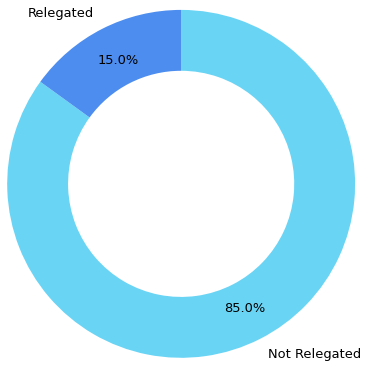

In [31]:
Relegated_count=FinalMergedDF['Relegated'].value_counts()
plt.pie(Relegated_count,labels=['Not Relegated','Relegated'],startangle=90,counterclock=False,wedgeprops = {'width' : 0.7},radius=2,autopct='%.1f%%',
        pctdistance=0.8,colors=['#6AD4F5','#4C8DEF'],textprops={'fontsize': 13})

In [32]:
x=FinalMergedDF.drop('Relegated',axis=1)
y=FinalMergedDF['Relegated']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 


In [33]:

MNB = MultinomialNB()
MNB.fit(x_train, y_train)
y_pred=MNB.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       158
           1       0.33      0.50      0.40        24

    accuracy                           0.80       182
   macro avg       0.63      0.67      0.64       182
weighted avg       0.84      0.80      0.82       182



In [34]:
GNB = GaussianNB()
GNB.fit(x_train, y_train)
y_pred=GNB.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       158
           1       0.42      0.67      0.52        24

    accuracy                           0.84       182
   macro avg       0.68      0.76      0.71       182
weighted avg       0.88      0.84      0.85       182



([<matplotlib.patches.Wedge at 0x24a3ad3c790>,
 [Text(2.2, 0.0, 'Not Relegated'),
  Text(-2.2, -2.6942229581241775e-16, 'Relegated')],
 [Text(1.6, 0.0, '50.0%'), Text(-1.6, -1.9594348786357652e-16, '50.0%')])

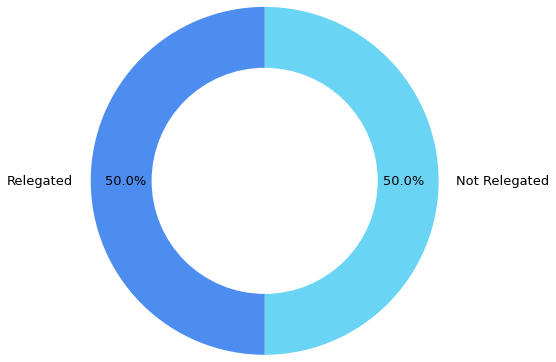

In [35]:
"""smote=SMOTE(sampling_strategy='minority')
x_train,y_train=smote.fit_resample(x_train,y_train)
Relegated_count=y_train.value_counts()
plt.pie(Relegated_count,labels=['Not Relegated','Relegated'],startangle=90,counterclock=False,wedgeprops = {'width' : 0.7},radius=2,autopct='%.1f%%',
        pctdistance=0.8,colors=['#6AD4F5','#4C8DEF'],textprops={'fontsize': 13})"""
Oversample=RandomOverSampler(sampling_strategy='minority')
x_train,y_train=Oversample.fit_resample(x_train,y_train)
Relegated_count=y_train.value_counts()
plt.pie(Relegated_count,labels=['Not Relegated','Relegated'],startangle=90,counterclock=False,wedgeprops = {'width' : 0.7},radius=2,autopct='%.1f%%',
        pctdistance=0.8,colors=['#6AD4F5','#4C8DEF'],textprops={'fontsize': 13})

In [36]:
MNB.fit(x_train, y_train)
y_pred=MNB.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.72      0.82       158
           1       0.30      0.79      0.44        24

    accuracy                           0.73       182
   macro avg       0.63      0.76      0.63       182
weighted avg       0.87      0.73      0.77       182



In [37]:
GNB = GaussianNB()
GNB.fit(x_train, y_train)
y_pred=GNB.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.74      0.84       158
           1       0.32      0.79      0.45        24

    accuracy                           0.75       182
   macro avg       0.64      0.77      0.64       182
weighted avg       0.87      0.75      0.79       182



In [38]:
RFC=RandomForestClassifier()
RFC.fit(x_train, y_train)
y_pred=RFC.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       158
           1       0.40      0.50      0.44        24

    accuracy                           0.84       182
   macro avg       0.66      0.69      0.67       182
weighted avg       0.85      0.84      0.84       182



In [39]:
XGB=XGBClassifier()
XGB.fit(x_train, y_train)
y_pred=XGB.predict(x_test)
print(classification_report(y_test, y_pred))

[15:37:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       158
           1       0.44      0.67      0.53        24

    accuracy                           0.85       182
   macro avg       0.69      0.77      0.72       182
weighted avg       0.88      0.85      0.86       182



C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\DELL\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [43]:
LGB=lgb()
LGB.fit(x_train, y_train)
y_pred=LGB.predict(x_test)
print(classification_report(y_test, y_pred))

TypeError: 'module' object is not callable

In [40]:
FinalMergedDF_copy=FinalMergedDF.copy(deep=True)
s = StandardScaler()
FinalMergedDF_copy[['CountWins', 'CountLosses', 'CountDraws']] = s.fit_transform(FinalMergedDF_copy[['CountWins', 'CountLosses', 'CountDraws']])
x_copy=FinalMergedDF_copy.drop('Relegated',axis=1)
y_copy=FinalMergedDF_copy['Relegated']
smote=SMOTE(sampling_strategy='minority')
x_train, x_test, y_train, y_test = train_test_split(x_copy, y_copy, test_size=0.3, random_state=42)
x_train,y_train=smote.fit_resample(x_train,y_train)

In [41]:
MNB.fit(x_train, y_train)
y_pred=MNB.predict(x_test)
print(classification_report(y_test, y_pred))

ValueError: Negative values in data passed to MultinomialNB (input X)

In [44]:
GNB.fit(x_train, y_train)
y_pred=GNB.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.74      0.84       158
           1       0.32      0.79      0.45        24

    accuracy                           0.75       182
   macro avg       0.64      0.77      0.64       182
weighted avg       0.87      0.75      0.79       182



In [45]:
RFC=RandomForestClassifier()
RFC.fit(x_train, y_train)
y_pred=RFC.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       158
           1       0.40      0.50      0.44        24

    accuracy                           0.84       182
   macro avg       0.66      0.69      0.67       182
weighted avg       0.85      0.84      0.84       182



In [46]:
XGB=XGBClassifier()
XGB.fit(x_train, y_train)
y_pred=XGB.predict(x_test)
print(classification_report(y_test, y_pred))

[15:45:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       158
           1       0.44      0.58      0.50        24

    accuracy                           0.85       182
   macro avg       0.69      0.73      0.70       182
weighted avg       0.87      0.85      0.86       182



C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\DELL\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
